## Classification: APS Failure at Scania Trucks: Tree Based Methods

In [0]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import variation
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics


## Data Preparation

In [0]:
name = 'aps_failure_training_set (1).csv'
name2 = 'aps_failure_test_set (2).csv'
trainf = pd.read_csv(root+name,na_values = "na")
testf = pd.read_csv(root + name2,na_values = "na")

In [0]:
fulldf = pd.concat([testf,trainf])
#fulldf.drop(['class'],axis = 1)
fulldf = fulldf.drop(columns=['class'])
fulldf.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,1846.0,0.0,0.0,0.0,3976.0,0.0,0.0,0.0,1520.0,2374.0,11516.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,1100.0,574.0,232.0,66.0,780.0,882.0,0.0,4.0,0.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,3636.0,0.0,0.0,0.0,5244.0,0.0,60.0,0.0,0.0,0.0,23174.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,...,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,3996.0,584.0,200.0,62.0,37580.0,3756.0,6368.0,36.0,0.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,452706.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,0.0,77898.0,110548.0,3605894.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,...,0.0,3613906.0,4218.0,692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25278.0,9438.0,2504.0,10262714.0,1278664.0,109700.0,19072.0,9520.0,4902.0,4434614.0,70900.0,0.0,0.0,26002880.0,2057.84,2158.0,396312.0,538136.0,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,984314.0,1680050.0,1135268.0,92606.0,14038.0,1772828.0,0.0,0.0,0.0,1116.0,2372.0,3546760.0,3053176.0,652616.0,423374.0,0.0,0.0,7274.0,0.0,1622.0,432.0,0.0,0.0,0.0,0.0,0.0,6388.0,1091104.0,2930694.0,...,46.0,3413978.0,2924.0,414.0,0.0,0.0,60.0,38710.0,0.0,0.0,0.0,0.0,27740.0,33354.0,6330.0,0.0,0.0,133542.0,21290.0,2718360.0,435370.0,0.0,0.0,0.0,0.0,1179900.0,1541.32,1678.0,659550.0,691580.0,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,17926.0,82834.0,3114.0,0.0,0.0,48978.0,0.0,0.0,0.0,0.0,0.0,97146.0,89920.0,12932.0,5092.0,0.0,0.0,0.0,0.0,102.0,50.0,0.0,0.0,0.0,0.0,0.0,11544.0,73570.0,3662.0,...,0.0,95372.0,78.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,538.0,360.0,142.0,0.0,0.0,1822.0,344.0,2140.0,394.0,13664.0,110.0,0.0,0.0,813740.0,113.86,52.0,10216.0,9958.0,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [0]:
from sklearn.preprocessing import Imputer
imputer_ = Imputer(missing_values='NaN', strategy='mean', axis=1)
imputer_ = imputer_.fit(fulldf)
fulldf = pd.DataFrame(imputer_.fit_transform(fulldf), columns = fulldf.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Different ways to impute include averaging the mean from each column, however also (as used in problem 1), it is also common to predict the missing values based on a model that uses other features and the response variable, called regression imputation. In addition, there is hot deck imputation, cold deck imputation, interpolation, extrapolation, and stochastic regression imputation

In [0]:
fulldf.head()


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,1846.0,0.0,0.0,0.0,3976.0,0.0,0.0,0.0,1520.0,2374.0,11516.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,1100.0,574.0,232.0,66.0,780.0,882.0,0.0,4.0,0.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,3636.0,0.0,0.0,0.0,5244.0,0.0,60.0,0.0,0.0,0.0,23174.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,...,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,3996.0,584.0,200.0,62.0,37580.0,3756.0,6368.0,36.0,0.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,452706.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,0.0,77898.0,110548.0,3605894.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,...,0.0,3613906.0,4218.0,692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25278.0,9438.0,2504.0,10262714.0,1278664.0,109700.0,19072.0,9520.0,4902.0,4434614.0,70900.0,0.0,0.0,26002880.0,2057.84,2158.0,396312.0,538136.0,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,503726.751288,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,984314.0,1680050.0,1135268.0,92606.0,14038.0,1772828.0,0.0,0.0,0.0,1116.0,2372.0,3546760.0,3053176.0,652616.0,423374.0,0.0,0.0,7274.0,0.0,1622.0,432.0,0.0,0.0,0.0,0.0,0.0,6388.0,1091104.0,2930694.0,...,46.0,3413978.0,2924.0,414.0,0.0,0.0,60.0,38710.0,0.0,0.0,0.0,0.0,27740.0,33354.0,6330.0,0.0,0.0,133542.0,21290.0,2718360.0,435370.0,0.0,0.0,0.0,0.0,1179900.0,1541.32,1678.0,659550.0,691580.0,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,26483.134000,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,17926.0,82834.0,3114.0,0.0,0.0,48978.0,0.0,0.0,0.0,0.0,0.0,97146.0,89920.0,12932.0,5092.0,0.0,0.0,0.0,0.0,102.0,50.0,0.0,0.0,0.0,0.0,0.0,11544.0,73570.0,3662.0,...,0.0,95372.0,78.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,538.0,360.0,142.0,0.0,0.0,1822.0,344.0,2140.0,394.0,13664.0,110.0,0.0,0.0,813740.0,113.86,52.0,10216.0,9958.0,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [0]:
fulldf.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.133294,-0.037164,0.018445,0.364742,0.364745,0.014133,0.023590,0.092642,0.285045,0.355568,0.444802,0.379035,0.265893,0.074678,0.030619,0.506979,0.110675,0.093121,0.372672,0.271045,0.286372,0.507893,0.511714,0.459181,0.434752,0.384140,0.091628,0.096499,0.090778,0.366427,0.366101,0.032327,0.022653,0.052418,0.044458,0.069794,0.145778,0.266539,0.386969,...,0.294068,0.356074,0.368321,0.383781,0.354525,0.394461,0.376469,0.399032,0.394844,0.395511,0.317441,0.388218,0.183394,0.398110,0.386133,0.106383,0.402293,0.436667,0.392330,0.200871,0.353185,0.304659,0.391608,0.384715,0.384715,0.187499,0.209667,0.194843,0.347070,0.311612,0.399512,0.355264,0.395594,0.404105,0.407887,0.352093,0.211801,0.032567,0.384714,0.384715
ab_000,0.133294,1.000000,0.757533,0.143343,0.168501,0.168501,0.070169,0.074076,0.094618,0.132173,0.137926,0.224552,0.264682,0.243720,0.122789,0.073978,0.239107,0.054935,0.033598,0.201557,0.077774,0.084734,0.243899,0.233973,0.220696,0.242420,0.173367,0.031877,0.038745,0.031240,0.169148,0.168573,0.065904,0.059675,0.072850,0.081075,0.083560,0.107727,0.207182,0.201992,...,0.235088,0.273017,0.169649,0.173796,0.184609,0.204773,0.199264,0.201394,0.207701,0.207105,0.166745,0.204144,0.079561,0.186057,0.178687,0.097892,0.166535,0.201916,0.179598,0.318798,0.295997,0.098110,0.176717,0.173700,0.173699,0.106355,0.123613,0.143584,0.218670,0.229423,0.261377,0.239982,0.240350,0.226019,0.186683,0.136511,0.177299,0.081725,0.173697,0.173700
ac_000,-0.037164,0.757533,1.000000,0.000279,-0.053991,-0.053992,0.014085,0.012330,0.003103,-0.036335,-0.060801,-0.056235,-0.032403,-0.006721,0.007419,0.009626,-0.061056,0.035524,0.037955,-0.046954,-0.009735,-0.020398,-0.057525,-0.058762,-0.056855,-0.031103,-0.057661,0.038851,0.036726,0.038811,-0.054997,-0.055108,-0.002143,-0.000306,-0.000342,0.003396,0.000715,-0.011436,-0.016660,-0.050895,...,0.043468,0.060183,-0.055463,-0.057150,-0.056068,-0.062683,-0.059750,-0.064381,-0.061864,-0.062276,-0.052562,-0.061931,0.024217,-0.056185,-0.054568,-0.016144,-0.063037,-0.065853,-0.057465,0.161057,0.043961,-0.040904,-0.059078,-0.058180,-0.058180,-0.039997,-0.066900,-0.062336,-0.046995,-0.043627,-0.039783,-0.025677,-0.033466,-0.034073,-0.040020,-0.044310,0.004014,0.013045,-0.058184,-0.058180
ad_000,0.018445,0.143343,0.000279,1.000000,0.027817,0.027817,0.007642,0.008419,0.011944,0.020358,0.023518,0.033140,0.031469,0.025543,0.013331,0.008317,0.032243,0.007613,0.005283,0.036430,0.013853,0.014960,0.032283,0.031434,0.031804,0.031634,0.029334,0.005038,0.005533,0.004950,0.027955,0.027919,0.009347,0.008211,0.010036,0.010579,0.011347,0.014363,0.023012,0.028445,...,0.055225,0.025597,0.028069,0.029293,0.033595,0.037361,0.036166,0.036952,0.037644,0.037641,0.030628,0.037154,0.011606,0.030179,0.029419,0.019189,0.029154,0.032792,0.029808,0.020793,0.032511,0.015617,0.029838,0.029378,0.029378,0.012886,0.028859,0.026857,0.030658,0.030786,0.033817,0.029779,0.029734,0.028491,0.025651,0.020780,0.018321,0.008889,0.029378,0.029378
ae_000,0.364742,0.168501,-0.053991,0.027817,1.000000,1.000000,0.053738,0.064290,0.147200,0.383290,0.476968,0.604124,0.517063,0.398169,0.145211,0.064857,0.526395,0.097727,0.048852,0.631897,0.289497,0.346022,0.567059,0.560251,0.634036,0.566745,0.946674,0.047659,0.051905,0.044149,0.996809,0.996827,0.139252,0.087244,0.069738,0.092830,0.142786,0.323331,0.402245,0.518388,...,0.427449,0.346178,0.996782,0.948351,0.618416,0.690985,0.665108,0.671701,0.700611,0.

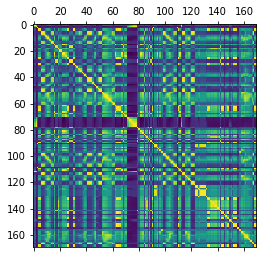

In [0]:
plt.matshow(fulldf.corr())
plt.show()

In [0]:
for col in fulldf.columns:
  number = (fulldf[col].std()/(fulldf[col].mean()))
  print('CV',col,number)
  

CV aa_000 4.328607835435765
CV ab_000 2.1707002901773853
CV ac_000 2.3077124637353608
CV ad_000 59.63804913064887
CV ae_000 7.674927290547521
CV af_000 7.674700706825765
CV ag_000 43.02111561724404
CV ag_001 38.96583899155258
CV ag_002 22.82486981320273
CV ag_003 8.915201353820095
CV ag_004 5.494093208237021
CV ag_005 2.993613047818248
CV ag_006 2.3783699850946287
CV ag_007 2.8916121255727996
CV ag_008 10.020082349848728
CV ag_009 30.027991454295112
CV ah_000 2.3331984155689387
CV ai_000 20.020081443281974
CV aj_000 28.33377136595198
CV ak_000 6.651376966165527
CV al_000 9.51058952234333
CV am_0 8.920744755067448
CV an_000 2.27292653031339
CV ao_000 2.2927091544408107
CV ap_000 3.1025790188686497
CV aq_000 2.956569083018378
CV ar_000 7.268807563177357
CV as_000 29.869860540617303
CV at_000 23.431128763488022
CV au_000 29.761687013616324
CV av_000 7.61322707825385
CV ax_000 7.654934814946201
CV ay_000 30.3711407169568
CV ay_001 33.54469216368834
CV ay_002 28.686184888101653
CV ay_003 26

In [0]:
listy = []
for col in fulldf.columns:
  number2 = (fulldf[col].std()/(fulldf[col].mean()))
  listy.append(number2)

In [0]:
dict = {}
keys = range(170)
for i in keys:
  dict[i] = listy[i]

In [0]:
#received sorted from stackoverflow
import operator
sort = sorted(dict.items(), key=lambda kv: kv[1])
print(sort)

[(89, 0.3560732939769117), (87, 1.3605299995832825), (131, 1.9102402136401724), (125, 1.9356592121921743), (78, 2.023178066929013), (77, 2.0430490406484596), (76, 2.0843549310615295), (75, 2.1576522783280914), (112, 2.1706889767404514), (1, 2.1707002901773853), (119, 2.19522993031149), (74, 2.2704170548370133), (22, 2.27292653031339), (23, 2.2927091544408107), (2, 2.3077124637353608), (67, 2.331367392800578), (16, 2.3331984155689387), (104, 2.3668062733661515), (12, 2.3783699850946287), (94, 2.4072184287755336), (73, 2.411140640567197), (62, 2.4309010591312834), (82, 2.431060804831876), (111, 2.4310608131409133), (81, 2.431060978086893), (118, 2.5287065521846244), (83, 2.6079087977150444), (88, 2.622257972434548), (103, 2.6698222420336224), (53, 2.6846628331582525), (160, 2.709950492348216), (52, 2.7168467269461556), (162, 2.7300744711571068), (149, 2.8306492372387226), (46, 2.864555275664221), (13, 2.8916121255727996), (72, 2.920368745515582), (25, 2.956569083018378), (163, 2.97441678

In [0]:
numbers = [33,99,41,7,50,114,51,6,121,122,3,109,91]
anotha = []
for i in numbers:
  print(fulldf.columns[i])
  features = fulldf.columns[i]
  anotha.append(features)
print(anotha)
neww = fulldf[anotha]
neww.shape

ay_001
cn_000
ay_009
ag_001
az_008
cs_001
az_009
ag_000
cs_008
cs_009
ad_000
co_000
cf_000
['ay_001', 'cn_000', 'ay_009', 'ag_001', 'az_008', 'cs_001', 'az_009', 'ag_000', 'cs_008', 'cs_009', 'ad_000', 'co_000', 'cf_000']


(76000, 13)

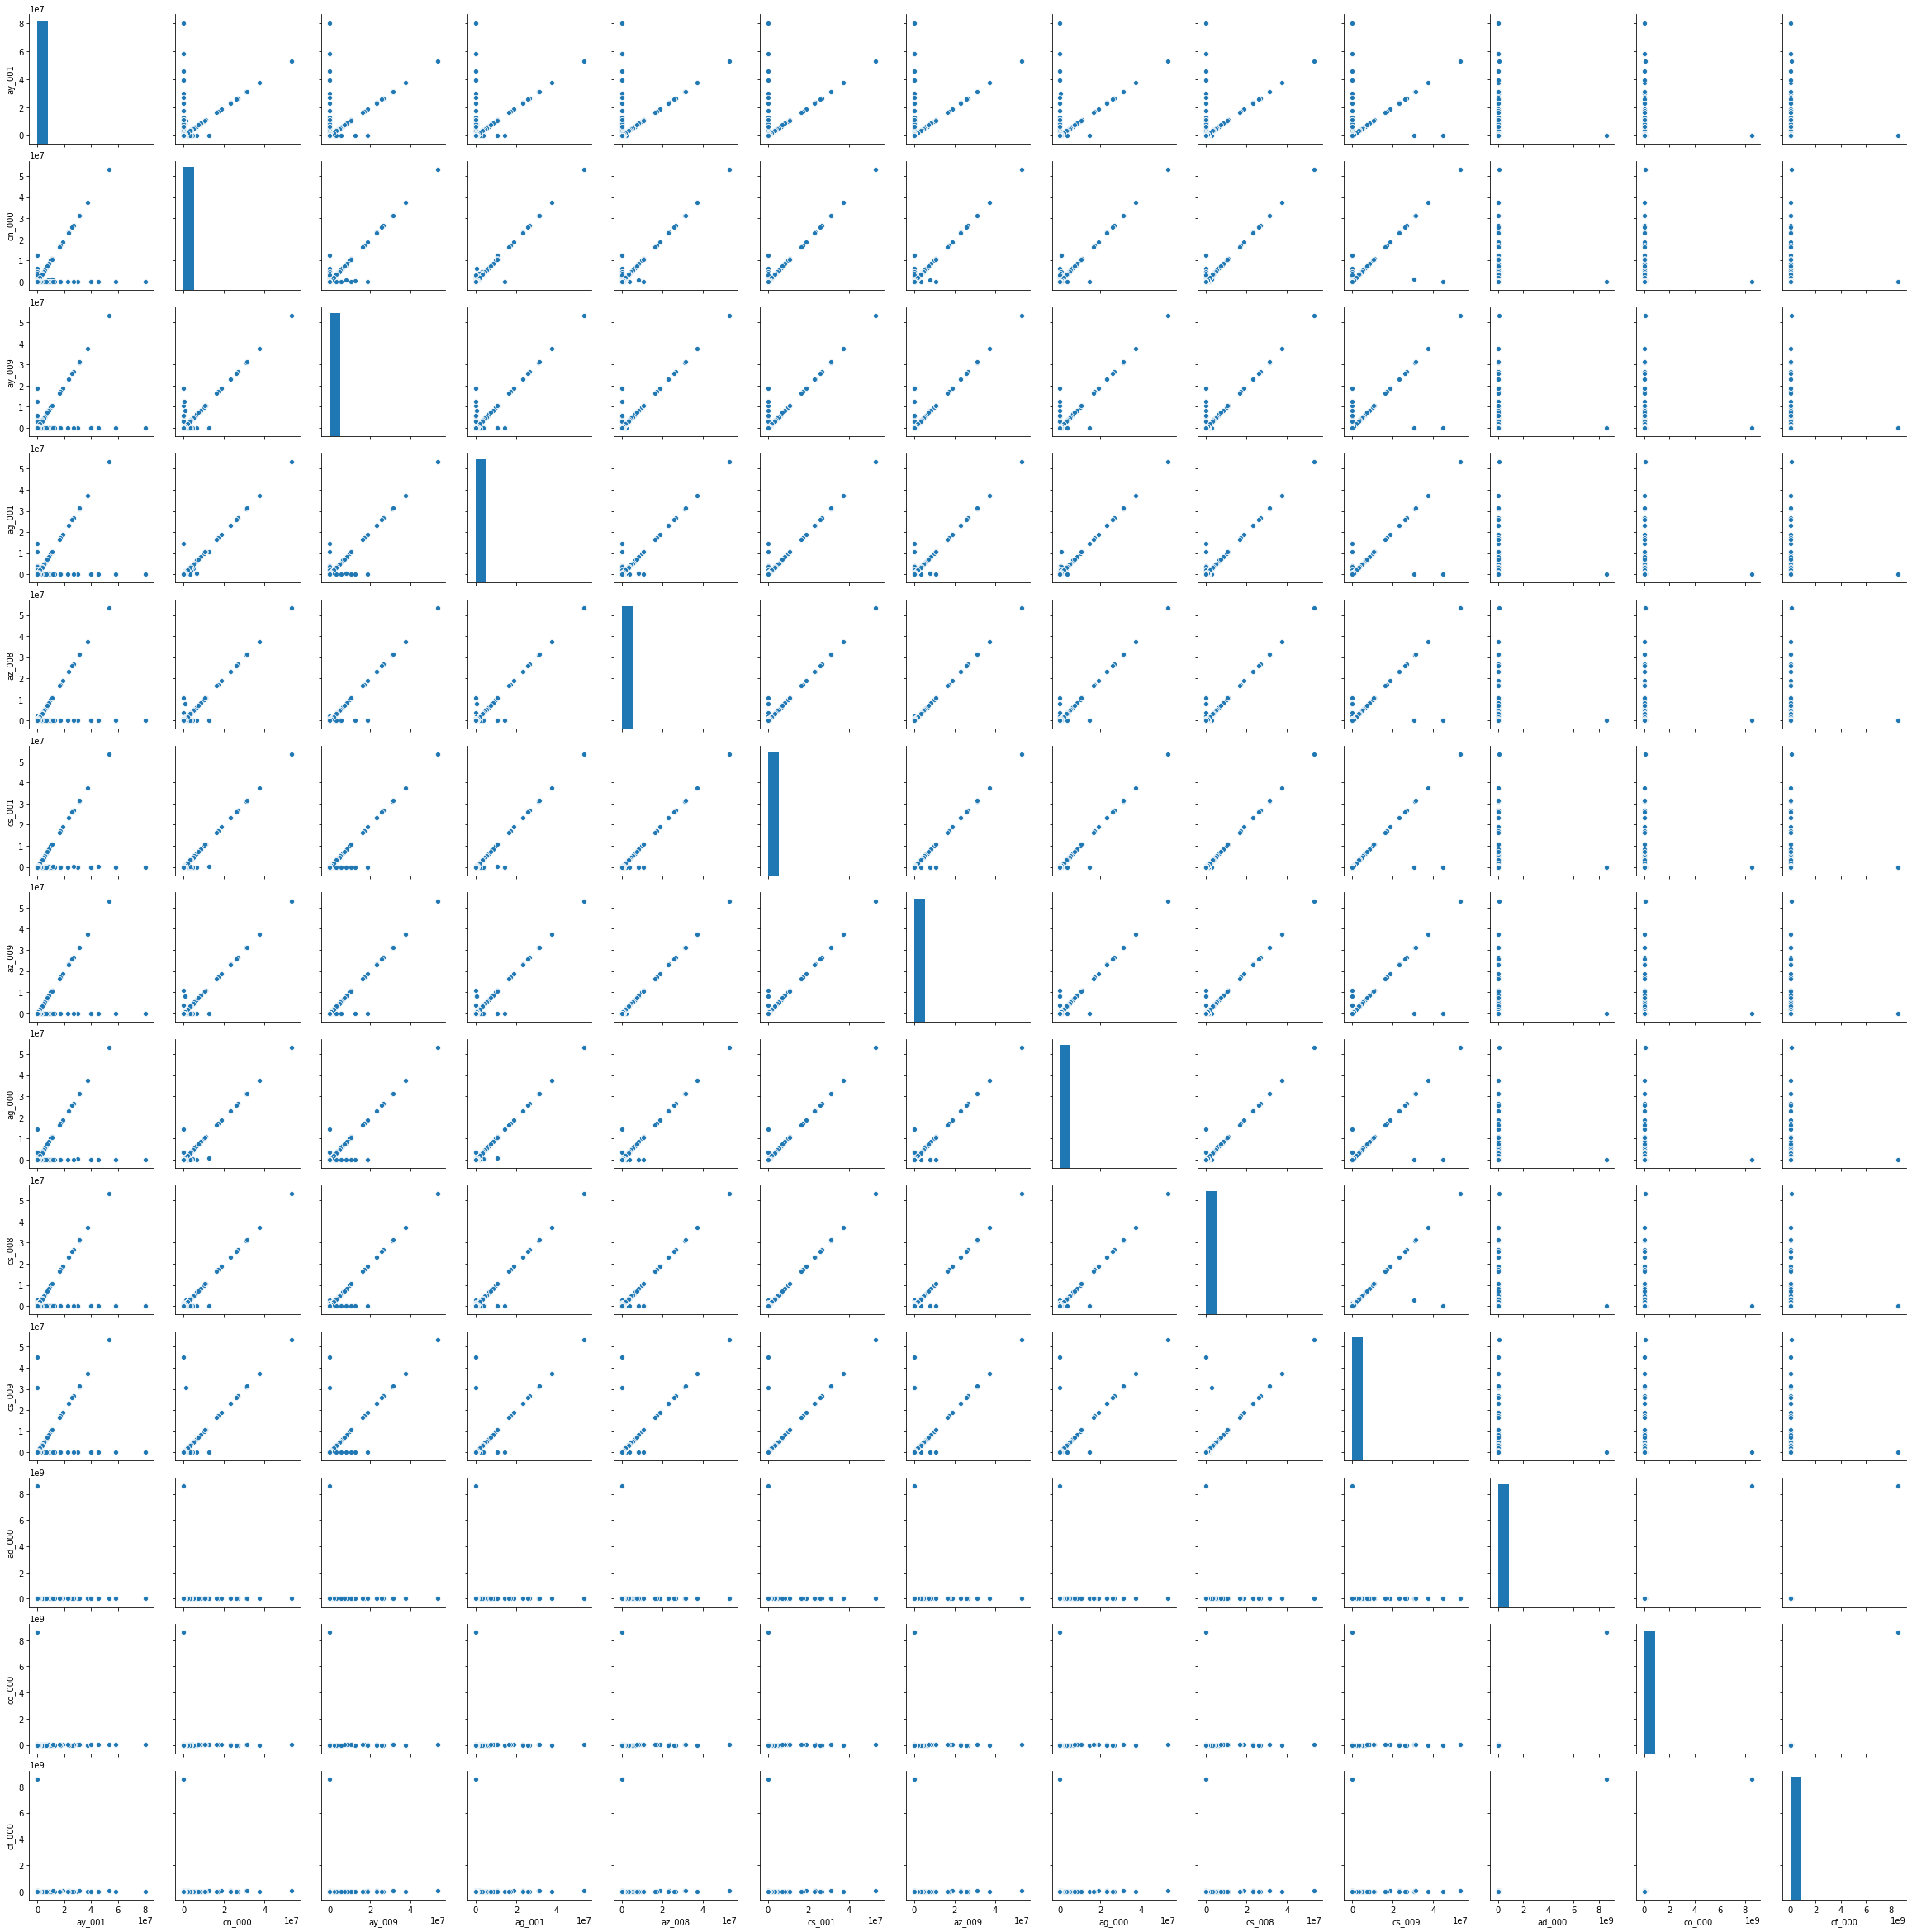

In [0]:
scatterplot = sns.pairplot(data = neww)

In [0]:
anothadf = pd.concat([testf,trainf])
df10 = anothadf.loc[anothadf['class'] == 'neg']
df11 = anothadf.loc[anothadf['class'] == 'pos']
negative = len(df10)
positive = len(df11)
print('NEGATIVE CLASS COUNT:', negative)
print('POSITIVE CLASS COUNT:', positive)

NEGATIVE CLASS COUNT: 74625
POSITIVE CLASS COUNT: 1375


##Random Forest

In [0]:
name = 'aps_failure_training_set (1).csv'
name2 = 'aps_failure_test_set (2).csv'
trainf = pd.read_csv(root+name,na_values = "na")
testf = pd.read_csv(root + name2,na_values = "na")

In [0]:
trainf

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,1603216.0,6015982.0,1968266.0,164972.0,12560.0,4880368.0,0.0,280.0,0.0,1224.0,2114.0,8913782.0,7998174.0,1929126.0,776370.0,2.0,0.0,0.0,0.0,3328.0,1080.0,0.0,0.0,0.0,0.0,0.0,45114.0,2533260.0,...,0.0,1872932.0,4936.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62846.0,137050.0,27546.0,0.0,0.0,265640.0,54496.0,470800.0,293652.0,0.0,0.0,0.0,0.0,80125300.0,2912.04,2858.0,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,99186.0,36564.0,128.0,0.0,0.0,56982.0,0.0,0.0,0.0,0.0,0

In [0]:
#MAP CLASSES
trainf['class'] = trainf['class'].map({'neg': 0, 'pos': 1})
testf['class'] = testf['class'].map({'neg': 0, 'pos': 1})
trainf.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [0]:
#IMPUTE MISSING VALUES WITH MEAN
trainf = pd.DataFrame(imputer_.fit_transform(trainf), columns = trainf.columns)
testf = pd.DataFrame(imputer_.fit_transform(testf), columns = testf.columns)
print(trainf.shape)
print(testf.shape)

(60000, 171)
(16000, 171)


In [0]:
#SPLIT DATA TRAIN AND TEST SETS
train_X = trainf.iloc[:,1:len(trainf.columns)]
train_y = trainf.iloc[:,0:1]
test_X = testf.iloc[:,1:len(testf.columns)]
test_y = testf.iloc[:,0:1]
print(train_X.shape)
print(train_y.shape)

(60000, 170)
(60000, 1)


In [0]:
#RANDOM FOREST FIT
rfc = RandomForestClassifier(n_estimators = 100,oob_score = True)
rfc.fit(train_X,train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

ACCURACY TRAIN SCORE: 1.0
PRECISION TRAIN SCORE: 1.0
[[59000     0]
 [    0  1000]]
AREA UNDER CURVE: 1.0


Text(0, 0.5, 'TRUE POSITIVE')

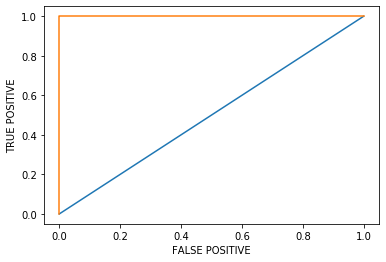

In [0]:
#TRAIN SET RESULTS
predict = rfc.predict(train_X)
print("TRAIN ACCURACY SCORE:",metrics.accuracy_score(predict, train_y))
print("OOB ERROR:", 1- rfc.oob_score_)
prob = rfc.predict_proba(train_X)[:,1]

matrix = metrics.confusion_matrix(predict,train_y)
print(matrix)
#prob = logR.predict_proba(X9)[:,1]

false_p,true_p,_ = metrics.roc_curve(train_y,prob)
auc = metrics.roc_auc_score(train_y, prob)
print('AREA UNDER CURVE:', auc)
plt.plot([0,1],[0,1])

plt.plot(false_p,true_p)
plt.xlabel('FALSE POSITIVE')
plt.ylabel('TRUE POSITIVE')

TEST ACCURACY: 0.9915
PRECISION TEST SCORE: 0.688
[[15606   117]
 [   19   258]]
AREA UNDER CURVE: 0.9941019306666669


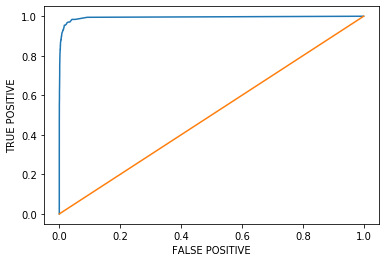

In [0]:
#TEST SET RESULTS
predictt = rfc.predict(test_X)
print("TEST ACCURACY:",metrics.accuracy_score(predictt, test_y))
print("PRECISION TEST SCORE:",metrics.precision_score(predictt, test_y))

probt = rfc.predict_proba(test_X)[:,1]

matrix = metrics.confusion_matrix(predictt,test_y)
print(matrix)

false_p,true_p,_ = metrics.roc_curve(test_y,probt)
auc = metrics.roc_auc_score(test_y, probt)
print('AREA UNDER CURVE:', auc)

plt.plot(false_p,true_p)
plt.xlabel('FALSE POSITIVE')
plt.ylabel('TRUE POSITIVE')
plt.plot([1,0],[1,0])

##Random Forest Balanced Data

In [0]:
rfcc = RandomForestClassifier(n_estimators = 100,oob_score = True, class_weight = 'balanced')
rfcc.fit(train_X,train_y)
predictc = rfcc.predict(train_X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ACCURACY TRAIN SCORE: 1.0
OOB ERROR: 0.0075666666666667215


ACCURACY TRAIN SCORE: 1.0
OOB ERROR: 0.0075666666666667215
[[59000     0]
 [    0  1000]]
AREA UNDER CURVE: 1.0


Text(0, 0.5, 'TRUE POSITIVE')

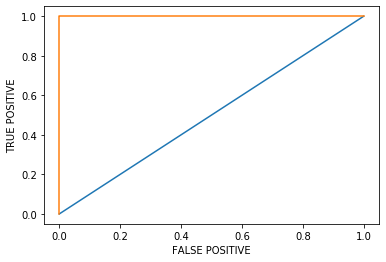

In [0]:
#TRAIN SET IMBALANCE ADJUSTED
print("ACCURACY TRAIN SCORE:",metrics.accuracy_score(predictc, train_y))
print("OOB ERROR:", 1- rfcc.oob_score_)

probC = rfcc.predict_proba(train_X)[:,1]

matrix = metrics.confusion_matrix(predict,train_y)
print(matrix)
#prob = logR.predict_proba(X9)[:,1]

false_p,true_p,_ = metrics.roc_curve(train_y,probC)
auc = metrics.roc_auc_score(train_y, probC)
print('AREA UNDER CURVE:', auc)
plt.plot([0,1],[0,1])

plt.plot(false_p,true_p)
plt.xlabel('FALSE POSITIVE')
plt.ylabel('TRUE POSITIVE')

TEST ACCURACY: 0.9893125
[[15614   160]
 [   11   215]]
AREA UNDER CURVE: 0.9894143146666667


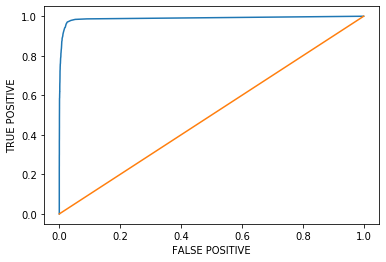

In [0]:
#TEST SET IMBALANCE ADJUSTED
predicto = rfcc.predict(test_X)
print("TEST ACCURACY:",metrics.accuracy_score(predicto, test_y))

probo = rfcc.predict_proba(test_X)[:,1]

matrix = metrics.confusion_matrix(predicto,test_y)
print(matrix)

false_p,true_p,_ = metrics.roc_curve(test_y,probo)
auc = metrics.roc_auc_score(test_y, probo)
print('AREA UNDER CURVE:', auc)

plt.plot(false_p,true_p)
plt.xlabel('FALSE POSITIVE')
plt.ylabel('TRUE POSITIVE')
plt.plot([1,0],[1,0])

## Logistic Model Weka Wrapper Setup

In [0]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import variation
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [0]:
import weka.core.converters as converters
from weka.core.converters import Loader
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls
import weka.plot.classifiers as plcls
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Imputer

In [0]:
import os 
import sys 
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/") 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/" 
!apt-get install build-essential python3-dev 
!apt-get install python3-pil python3-pygraphviz 
!apt install openjdk-11-jdk 
!pip3 install javabridge --no-cache-dir 
!pip3 install python-weka-wrapper3 --no-cache-dir 
import weka.core.jvm as jvm 
jvm.start()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pil is already the newest version (5.1.0-1).
python3-pygraphviz is already the newest version (1.4~rc1-1build2.1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.4+11-1ubuntu2~18.04.3).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.6/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [0]:
jvm.start()

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


## Logistic Model Tree Train&Test

In [0]:
from sklearn.preprocessing import Imputer
imputer_ = Imputer(missing_values='NaN', strategy='mean', axis=1)
name = 'aps_failure_training_set (1).csv'
name2 = 'aps_failure_test_set (2).csv'
#load
trainf = pd.read_csv(root+name,na_values = "na")
testf = pd.read_csv(root + name2,na_values = "na")
#extract class labels
train_c = trainf.iloc[:,0:1]
test_c = testf.iloc[:,0:1]

#drop class labels
trainf = trainf.drop(columns=['class'])
testf = testf.drop(columns=['class'])

#impute
trainf = pd.DataFrame(imputer_.fit_transform(trainf), columns = trainf.columns)
testf = pd.DataFrame(imputer_.fit_transform(testf), columns = testf.columns)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from google.colab import files
#concat back

traindf = pd.concat([train_c,trainf], axis = 1)
testdf = pd.concat([test_c,testf], axis = 1)

#download
traindf.to_csv('trainy.csv') 
!cp trainy.csv gdrive/My\ Drive/Data4

testdf.to_csv('testy.csv') 
!cp testy.csv gdrive/My\ Drive/Data4

In [0]:
#weka wrapper
data1 = converters.load_any_file(root + 'train_y.csv')
data2 = converters.load_any_file(root + 'test_f.csv')
data1.class_is_first()
data2.class_is_first()

In [0]:
clf = Classifier(classname="weka.classifiers.trees.LMT")

In [0]:
#cross validate
#model evaluation as well - see how the model does on cross validate and then build clasifier on train, test set, compare
evl = Evaluation(data1)
evl.crossvalidate_model(clf,data1,5,Random(1))

In [0]:
print(evl.summary())
print(evl.percent_correct)


Correctly Classified Instances       59531               99.2183 %
Incorrectly Classified Instances       469                0.7817 %
Kappa statistic                          0.7432
Mean absolute error                      0.0109
Root mean squared error                  0.0815
Relative absolute error                 33.1136 %
Root relative squared error             63.6874 %
Total Number of Instances            60000     

99.21833333333333


In [0]:
clf = clf.build_classifier(data1)

In [0]:
#predict on train
predict = evaluation.test_model(clf,data1)

In [0]:
#confusion matrix,ROC,AUC on train
matrix = metrics.confusion_matrix(data1.values(0),predict)

In [0]:
print("TRAIN ACCURACY SCORE:",metrics.accuracy_score(predict, data1.values(0)))

TRAIN ACCURACY SCORE: 0.9944


In [0]:
print(matrix)

[[58931    69]
 [  267   733]]


Text(0, 0.5, 'TRUE POSITIVE')

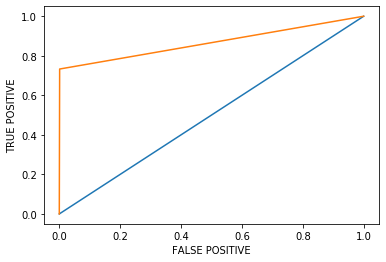

In [0]:
false_p,true_p,_ = metrics.roc_curve(data1.values(0),predict)
#auc = metrics.roc_auc_score(train_y, prob)
#print('AREA UNDER CURVE:', auc)
plt.plot([0,1],[0,1])

plt.plot(false_p,true_p)
plt.xlabel('FALSE POSITIVE')
plt.ylabel('TRUE POSITIVE')

In [0]:
auc_score1 = metrics.roc_auc_score(data1.values(0),predict)
print('AUC SCORE:', auc_score1)

AUC SCORE: 0.8659152542372882


In [0]:
#test set classifier
evaluation2 = Evaluation(data2)
prediction = evaluation2.test_model(clf, data2, output=None)

In [0]:
print("TEST ACCURACY SCORE:",metrics.accuracy_score(prediction, data2.values(0)))

TEST ACCURACY SCORE: 0.9895625


In [0]:
matrix2 = metrics.confusion_matrix(data2.values(0),prediction)

In [0]:
print(matrix2)

[[15585    40]
 [  127   248]]


Text(0, 0.5, 'TRUE POSITIVE')

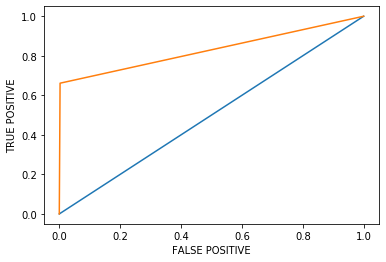

In [0]:
false_pp,true_pp,_ = metrics.roc_curve(data2.values(0),prediction)
#auc = metrics.roc_auc_score(train_y, prob)
#print('AREA UNDER CURVE:', auc)
plt.plot([0,1],[0,1])

plt.plot(false_pp,true_pp)
plt.xlabel('FALSE POSITIVE')
plt.ylabel('TRUE POSITIVE')

In [0]:
auc_score = metrics.roc_auc_score(data2.values(0),prediction)
print('AUC SCORE:', auc_score)

AUC SCORE: 0.8293866666666666


## LOGISTIC MODEL TREE - SMOTE VERSION

In [0]:
train = 'train_y.csv'
train_set = pd.read_csv(root+train)
train_set['class'] = train_set['class'].map({'neg': 0, 'pos': 1})

In [0]:
train_X = train_set.iloc[:,1:len(train_set.columns)]
train_y = train_set.iloc[:,0:1]

In [0]:
train_X.shape

(60000, 170)

In [0]:
smt = SMOTE()
train_Xn, train_yn = smt.fit_sample(train_X, train_y.values.ravel())
X_t = pd.DataFrame(data = train_Xn)
y_t = pd.DataFrame(data = train_yn)
y_t[0] = y_t[0].map({0: 'neg', 1: 'pos'})

In [0]:
fulldf = pd.concat([y_t,X_t],axis = 1)

In [0]:
fulldf.head()

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,neg,76698.0,1.377036e+07,2.130706e+09,280.0000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0000,5.330690e+06,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,4.461603e+05,0.000000e+00,446160.3127,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,446160.3127,4.461603e+05,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,3.225849e+05,2.280000e+02,100.0000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0000,2.341048e+06,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000e+00,7.000000e+01,66.0000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,2.578000e+03,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,6.269397e+05,1.368000e+03,458.0000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0000,3.590004e+06,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [0]:
from google.colab import files

#download
fulldf.to_csv('smote.csv') 
!cp smote.csv gdrive/My\ Drive/Data4

In [0]:
#weka wrapper
smotef = pd.read_csv(root+'smotef.csv')
datas = converters.load_any_file(root + 'smotef.csv')
datas.class_is_first()

In [0]:
clf = Classifier(classname="weka.classifiers.trees.LMT")

In [0]:
#cross validate
#model evaluation as well - see how the model does on cross validate to estimate test error and then build clasifier on train, test set
evl = Evaluation(datas)
evl.crossvalidate_model(clf,datas,5,Random(1))

In [0]:
print(evl.summary())
print(evl.percent_correct)


Correctly Classified Instances      115575               97.9449 %
Incorrectly Classified Instances      2425                2.0551 %
Kappa statistic                          0.9589
Mean absolute error                      0.0339
Root mean squared error                  0.1294
Relative absolute error                  6.7881 %
Root relative squared error             25.8881 %
Total Number of Instances           118000     

97.94491525423729


In [0]:
#clf = clf.build_classifier(datas)

Train and Test

In [0]:
data_t = converters.load_any_file(root + 'smotef.csv')
data_t.class_is_first()

In [0]:
lmt = clf.build_classifier(data_t)

In [0]:
from weka.classifiers import Evaluation
evaluation = Evaluation(data_t)

In [0]:
predict = evaluation.test_model(clf,data_t)

In [0]:
from weka.classifiers import Evaluation
evll = Evaluation(data_t)
pred = evll.test_model(clf,data_t)
matrixx = metrics.confusion_matrix(data_t.values(0),pred)
print(matrixx)

[[57994  1006]
 [  249 58751]]


In [0]:
print("TRAIN ACCURACY SCORE:",metrics.accuracy_score(pred, data_t.values(0)))

TRAIN ACCURACY SCORE: 0.989364406779661


Text(0, 0.5, 'TRUE POSITIVE')

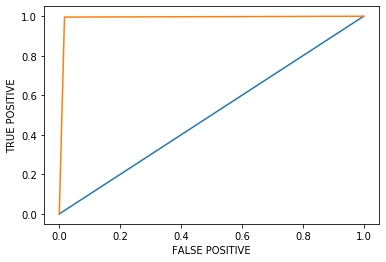

In [0]:
false_p,true_p,_ = metrics.roc_curve(data_t.values(0),pred)
plt.plot([0,1],[0,1])

plt.plot(false_p,true_p)
plt.xlabel('FALSE POSITIVE')
plt.ylabel('TRUE POSITIVE')

In [0]:
#download test_set
data2 = converters.load_any_file(root + 'test_f.csv')
data2.class_is_first()

In [0]:
#test set classifier
evaluation2 = Evaluation(data2)
predict_ = evaluation2.test_model(clf, data2)

In [0]:
matrix2 = metrics.confusion_matrix(data2.values(0),predict_)
print(matrix2)

[[15298   327]
 [   51   324]]


In [0]:
print("TEST ACCURACY SCORE:",metrics.accuracy_score(predict_, data2.values(0)))

TEST ACCURACY SCORE: 0.976375


Text(0, 0.5, 'TRUE POSITIVE')

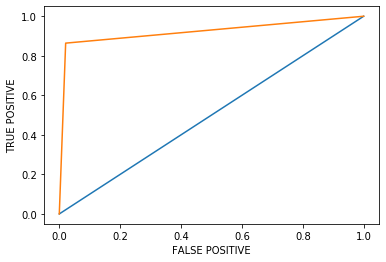

In [0]:
false_pp,true_pp,_ = metrics.roc_curve(data2.values(0),predict_)
plt.plot([0,1],[0,1])

plt.plot(false_pp,true_pp)
plt.xlabel('FALSE POSITIVE')
plt.ylabel('TRUE POSITIVE')

In [0]:
auc_score2 = metrics.roc_auc_score(data2.values(0),predict_)
print('AUC SCORE:', auc_score2)

AUC SCORE: 0.921536


SMOTE AUC much better with a .92 AUC score compared to .82 AUC score - reduced type 2 error (the more costly error -cost_2 error is 500 where as cost_1 is 10). SMOTE has 327 type I error, 51 type II error, where as the uncompensated case had 127 type I error, and 40 type II error.

So SMOTE wins, and would perform better according to the competition.